# <span style="color:#FA8072"> Credit Score Classification </span>

# <span style="color:#FA8072"> Table of Contents </span>

* [1. Summary](#summary)
* [2. Import Libraries](#import_libraries)
* [3. Load Data](#load_data)
* [4. Exploratory Data Analysis](#eda)
    * [4.1 Preview Dataset](#preview_dataset)
    * [4.2 Helper Functions](#helper_functions)
    * [4.3 Categorical Variables](#categorical_variables)
    * [4.4 Numerical Variables](#numerical_variables)
* [5. Data Transformation](#data_transformation)
* [6. Model Building](#model_building)

## <span style="color:#FA8072"> 1. Summary </span> <a class="anchor" id="summary"></a>

**The Credit Score Classification project aimed to develop a robust and accurate system for classifying credit scores. Credit score classification plays a vital role in assessing an individual's creditworthiness and determining their eligibility for loans, credit cards, and other financial services. It is a crucial component of risk assessment for financial institutions, helping them make informed decisions while minimizing the risk of defaults.**

**The project began with an exploratory data analysis (EDA) phase to gain insights into the dataset. Following the EDA, the data cleaning process involved handling missing values, removing duplicates, and addressing any inconsistencies or errors in the dataset. Additionally, data transformation techniques were employed to prepare the data for modeling, including feature scaling and encoding categorical variables.**

**The model building and evaluation stage focused on developing a multi-class classification model capable of accurately predicting credit score categories. Different machine learning algorithms such as decision trees,random forests, xgboost, KNN were implemented and evaluated for their performance. To address the issue of class imbalance, techniques such as oversampling the minority classes using SMOTE was employed. Model evaluation involved assessing metrics such as precision, recall, F1-score, and accuracy to measure the model's performance and ensure its effectiveness in classifying credit scores. The project concluded with a well-performing model that could assist financial institutions in making informed decisions based on accurate credit score classification.**

## <span style="color:#FA8072"> 2. Import Libraries </span> <a class="anchor" id="import_libraries"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [3]:
!pip install xgboost


## <span style="color:#FA8072"> 3. Load Data </span> <a class="anchor" id="load_data"></a>

In [4]:
df_train_original = pd.read_csv('train.csv')
df_train = df_train_original.copy()
df_train.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_21328\4136590211.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## <span style="color:#FA8072"> 4.  Exploratory Data Analysis </span> <a class="anchor" id="eda"></a>

## <span style="color:#FA8072"> 4.1  Preview Dataset </span> <a class="anchor" id="preview_dataset"></a>

In [5]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
#Check Data Size
print('Train Data Size : ',df_train.shape)

Train Data Size :  (100000, 28)


In [7]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
#Check Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<h4> Observations : </h4>
    
1. There are missing values present in dataset.
2. Train dataset has both numerical and string values. 

In [9]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [10]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


**Observations**
1. Customer_ID has 12500 unique values. It means we have data of 12500 customers.
2. Month has only 8 unique values. Better to analyse further which months are present. 
3. Age has 1788 unique values. This looks strange as general age range is from 0-100. 
4. SSN has 12501 unique values, whereas Customer_ID only has only 12500 unique values. There is a possibility that incorrect SSN value is entered for one of the customer as same person can't have multiple SSN. 

## <span style="color:#FA8072"> 4.2 Helper Functions </span> <a class="anchor" id="helper_functions"></a>
Created following functions that will help in exploring,analysing & cleaning of the data

In [11]:
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #DataType of column
    print("\nDataType: ",df[column].dtype)
    
    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [12]:
def fill_missing_with_group_mode(df, groupby, column):      
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())
    
    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)
    
    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

In [13]:
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    
    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column
    fill_missing_with_group_mode(df,groupby,column)

In [14]:
# Handle Outliers and null values
def fix_inconsistent_values(df, groupby, column):      
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')   
    
    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0][0], y[0][0]

    # assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)|(x<0)) else x)

    # fill with local mode
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)
    df[column].fillna(df[column].mean(),inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n') 
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

In [15]:
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    
    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
        
    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)

In [16]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [17]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [18]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

## <span style="color:#FA8072"> 4.3 Categorical Variables </span> <a class="anchor" id="categorical_variables"></a>

### Credit Score 

**Summary**

1. There are 3 different Credit Score - Standard, Good & Poor.
2. Distribution of credit score - 

   a) Standard - 53%
   
   b) Poor - 29%
   
   c) Good - 17%
   
3. There are no null values for Credit Score.

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

-----------------------------------------------------

Credit Score Distribution


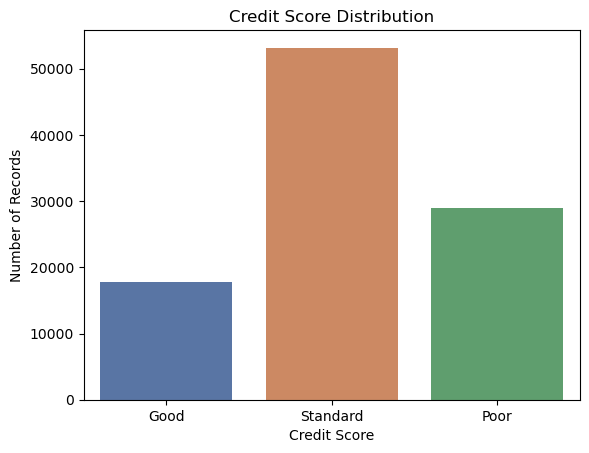

In [19]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

### <span> ID </span> <a class="anchor" id="id"></a>

**Summary**

1. There are 100000 distinct records and no null values present.

In [20]:
#Get Details
get_column_details(df_train,'ID')

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  100000

Distribution of column:

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64


### Customer ID 

**Summary**

1. We have record of 12500 unique customers. 
2. Same customer can have different credit score. It means that on the basis of other values customer credit score can change. 

In [21]:
#Get Details 
get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


In [22]:
#Check if same customer can have different credit score
df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

### Month 

**Summary**

1. In the training dataset, we have credit score for each customer over the course of 8 months(from January to August).
2. Converted Month column from object to datetime value so that it can be further use for model building. 
3. Distribution of Credit_Scrore across different months is similar.

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

-----------------------------------------------------

Month & Credit_Score Distribution


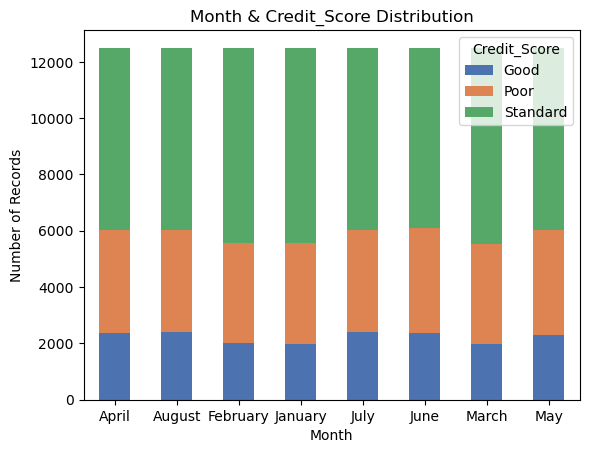

In [23]:
column_name = 'Month'

#Get Details
get_column_details(df_train,column_name)

#Plot Distrbution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score')

In [24]:
#Convert Month to datetime object
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

### Name 

**Summary**

1. There are 9985 null values. 
2. Cleaning Step - Assign same Name value to each Customer_ID

In [25]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name)

Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 9985

No. of missing values after filling with group mode: 0


### SSN 

**Summary**

1. There are 12501 unique SSN values in training dataset. 
2. 5572 entries has random/garbage value as SSN value
3. Steps to Clean SSN -

    i. Replace garbage value with np.nan
    
    ii. Assign same SSN value for each customer ID

In [26]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  12501

Distribution of column:

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 5572

No. of missing values after filling with group mode: 0


### Occupation 

**Summary**

1. There are 16 unique Occupation values. 
2. 7062 records are marked with garbage value.
3. Steps to Clean Occupation -

    i. Replace garbage value with np.nan
    
    ii. Assign same Occupation value for each customer ID
4. Distribution of Credit_Scrore across different occupation is similar.

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Occupation & Credit_Score Distribution


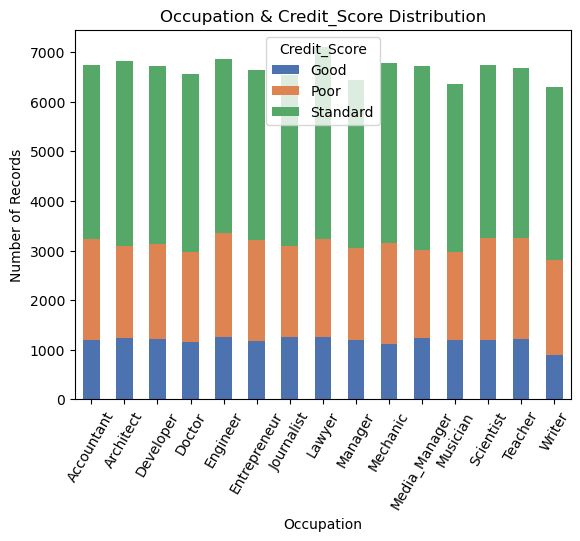

In [27]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

### Type of Loan

**Summary**

1. There are 6260 unique values present for Type of Loan and there are null values present.
2. Mapped all null values to *Not Specificed* for Type of Loan column.

In [28]:
#Get Details of Type of Loan column
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified,

In [29]:
#Handle Type of Loan null values
df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

### Credit Mix

**Summary**

1. There are 3 types of Credit Mix - Standard, Good, Bad
2. About 20k records of Credit Mix is marked as a garbage value (_).
3. Steps to Clean Credit Mix Field -

    i. Replace garbage value with np.nan
    
    ii. Assign same Credit Mix value for each customer ID

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 20195

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Credit_Mix & Credit_Score Distribution


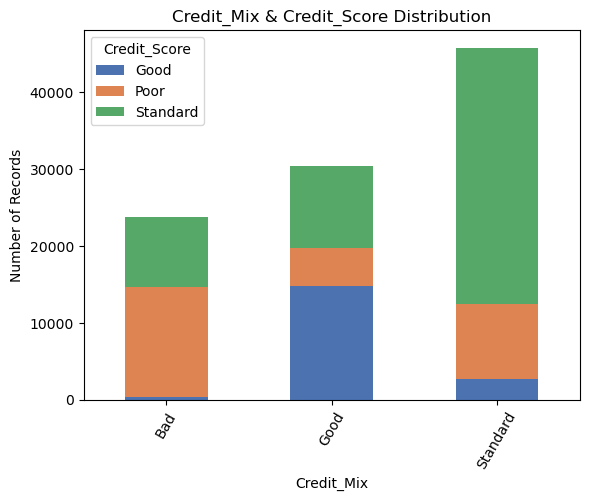

In [30]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

### Payment of Min Amount

**Summary**

1. There are 3 unique values present - Yes, No & NM.
2. No missing values are present.

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

-----------------------------------------------------

Payment_of_Min_Amount & Credit_Score Distribution


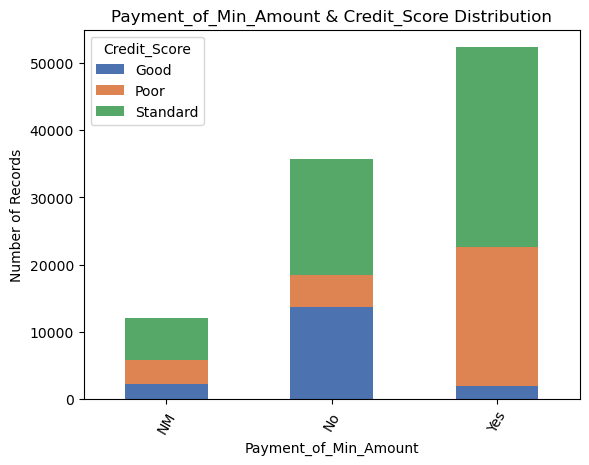

In [31]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df_train,column_name)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

### Payment Behaviour

**Summary**

1. There are 6 unique values of Payment Behaviour -

    Low_spent_Small_value_payments      
    High_spent_Medium_value_payments    
    Low_spent_Medium_value_payments     
    High_spent_Large_value_payments     
    High_spent_Small_value_payments     
    Low_spent_Large_value_payments  
   
2. Amount 27% of records are for Low_spent_Small_value_payments
    
3. For 7.6k records, Payment Behaviour is filled with garbage value

4. Steps to Clean Payment Behaviour Field -

    i. Replace garbage value with np.nan
    
    ii. Assign same Payment Behaviour value for each customer ID
    

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Payment_Behaviour & Credit_Score Distribution


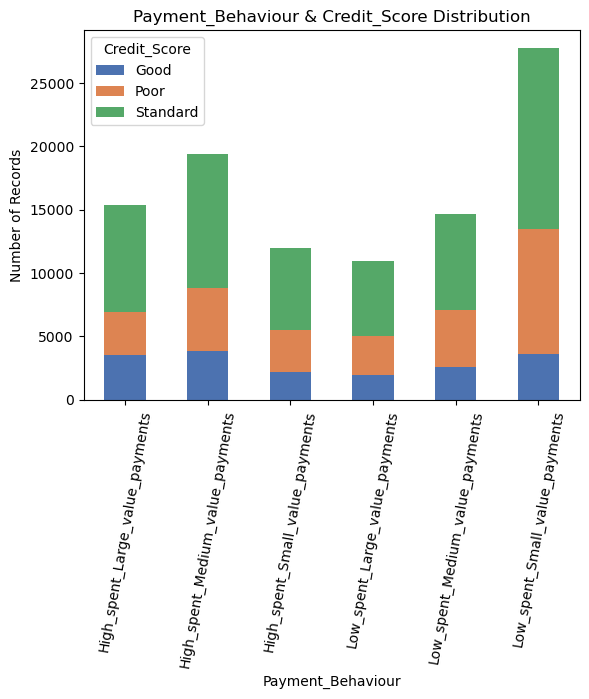

In [32]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=80)

## <span style="color:#FA8072"> 4.4 Numerical Variables </span> <a class="anchor" id="numerical_variables"></a>

**Cleaning Steps**
1. Remove Trailing & Leading speical characters.
2. Convert datatype from object to int/float if required.
3. Replace null values & outliers with mode value when group by Customer_ID

### Age

**Summary**

1. There are 1788 unique values of Age and it is stored as an object. Having 1788 distinct values of Age mean that there is a lot of dirty data.
2. After cleaning up Age value, 43 distinct Age remains. 
    


🔍 Détails de la colonne 'Age':
- Type : object
- Valeurs manquantes : 0
- Statistiques :
count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object

✅ Type de 'Age' converti en int


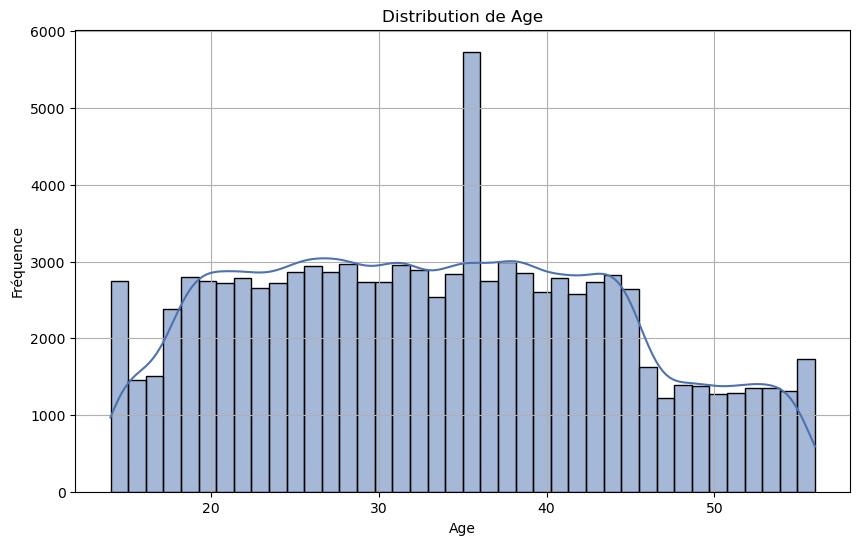

In [33]:
# 📌 Paramètres
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

# 🧾 Étape 1 : Afficher les détails de la colonne
def get_column_details(df, column):
    print(f"\n🔍 Détails de la colonne '{column}':")
    print(f"- Type : {df[column].dtype}")
    print(f"- Valeurs manquantes : {df[column].isna().sum()}")
    print(f"- Statistiques :\n{df[column].describe()}")

get_column_details(df_train, column_name)

# 🧹 Étape 2 : Nettoyage des valeurs numériques
def clean_numerical_field(df, groupby, column, strip='_', datatype='int'):
    # Nettoyage des caractères indésirables
    df[column] = df[column].astype(str).str.replace(strip, '', regex=False)
    
    # Conversion en numérique
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].astype(datatype)
    print(f"\n✅ Type de '{column}' converti en {datatype}")

    # Correction des valeurs incohérentes
    fix_inconsistent_values(df, groupby, column)

# 🧠 Étape 3 : Correction des valeurs incohérentes
def fix_inconsistent_values(df, groupby, column):
    df_grouped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    
    # Calcul du mode par groupe
    mode_values = df_grouped.apply(lambda x: stats.mode(x, keepdims=True).mode[0] if len(x) > 0 else np.nan)
    
    # Définir les bornes acceptables
    mini = mode_values.min()
    maxi = mode_values.max()
    
    # Remplacer les valeurs incohérentes par NaN
    df[column] = df[column].apply(lambda x: np.NaN if ((x < mini) or (x > maxi) or (x < 0)) else x)

# 📊 Étape 4 : Visualisation
def plot_displot(df, column, title, bins=40):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.title(f'Distribution de {title}')
    plt.xlabel(title)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()

# 🚀 Exécution
clean_numerical_field(df_train, group_by, column_name, strip='_', datatype='int')
plot_displot(df_train, column_name, user_friendly_name, bins=40)


### Annual Income

**Summary**

1. Annual Income has no null values. 
2. Most customers have a low Annual income. Distribution is right skewed. 


🔍 Détails de la colonne 'Annual_Income':
- Type : object
- Valeurs manquantes : 0
- Statistiques :
count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object

✅ Type de 'Annual_Income' converti en float


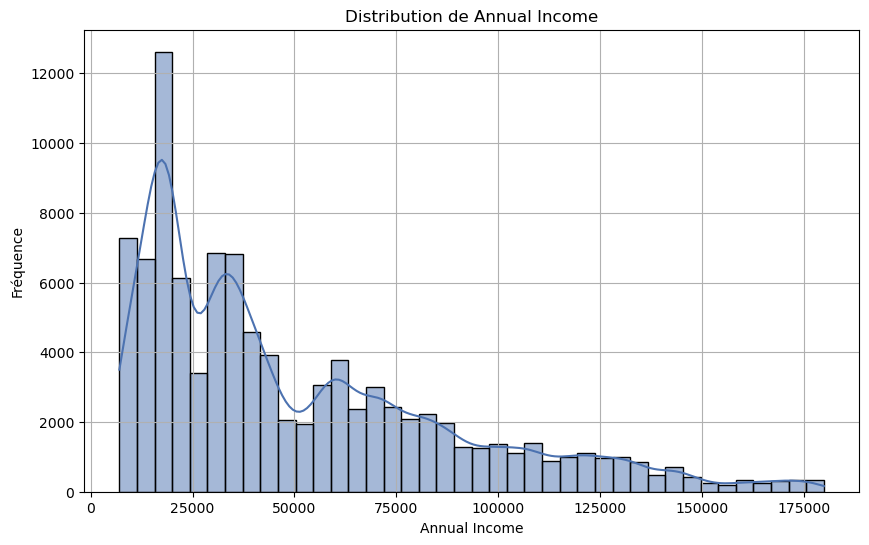

In [34]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

### Monthly Inhand Salary

**Summary**

1. There are null values present.
2. No outliers were present for Monthly Income Salary.
3. Most customers have a low monthly income. Distribution is right skewed.


🔍 Détails de la colonne 'Monthly_Inhand_Salary':
- Type : float64
- Valeurs manquantes : 15002
- Statistiques :
count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

✅ Type de 'Monthly_Inhand_Salary' converti en float


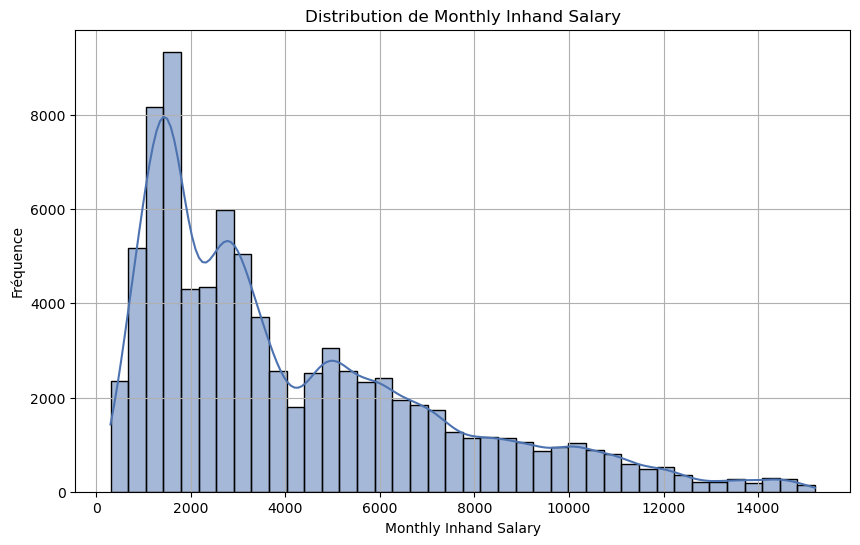

In [35]:
# 📌 Paramètres
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

# 🧾 Étape 1 : Détails de la colonne
def get_column_details(df, column):
    print(f"\n🔍 Détails de la colonne '{column}':")
    print(f"- Type : {df[column].dtype}")
    print(f"- Valeurs manquantes : {df[column].isna().sum()}")
    print(f"- Statistiques :\n{df[column].describe()}")

get_column_details(df_train, column_name)

# 🧹 Étape 2 : Nettoyage
def clean_numerical_field(df, groupby, column, strip='_', datatype='float'):
    # Nettoyage des caractères indésirables
    df[column] = df[column].astype(str).str.replace(strip, '', regex=False)
    
    # Conversion en numérique
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].astype(datatype)
    print(f"\n✅ Type de '{column}' converti en {datatype}")

    # Correction des valeurs incohérentes
    fix_inconsistent_values(df, groupby, column)

# 🧠 Étape 3 : Correction des incohérences
def fix_inconsistent_values(df, groupby, column):
    df_grouped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    
    # Calcul du mode par groupe
    mode_values = df_grouped.apply(lambda x: stats.mode(x, keepdims=True).mode[0] if len(x) > 0 else np.nan)
    
    # Définir les bornes acceptables
    mini = mode_values.min()
    maxi = mode_values.max()
    
    # Remplacer les valeurs incohérentes par NaN
    df[column] = df[column].apply(lambda x: np.NaN if ((x < mini) or (x > maxi) or (x < 0)) else x)

# 📊 Étape 4 : Visualisation
def plot_displot(df, column, title, bins=40):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.title(f'Distribution de {title}')
    plt.xlabel(title)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()

# 🚀 Exécution
clean_numerical_field(df_train, group_by, column_name)
plot_displot(df_train, column_name, user_friendly_name, bins=40)


### Num Bank Accounts

**Summary**

1. There are some outliers,negative values in Num Bank Accounts
2. After cleaning, there are 11 possible value of this field - Num Bank Accounts ranging from 0 to 10.
3. Majority of customers has no. of bank accounts between 3 to 8.


🔍 Détails de la colonne 'Num_Bank_Accounts':
- Type : int64
- Valeurs manquantes : 0
- Statistiques :
count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

✅ Type de 'Num_Bank_Accounts' converti en float

-----------------------------------------------------

Number of Bank Accounts Distribution


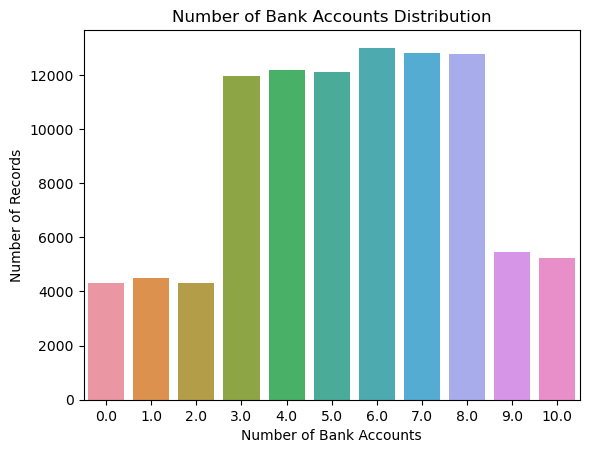

In [36]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

### Num Credit Cards

**Summary**

1. There are outliers present in the field as there are 1179 unique values of number of credit card.
2. After removing outliers, number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.



🔍 Détails de la colonne 'Num_Credit_Card':
- Type : int64
- Valeurs manquantes : 0
- Statistiques :
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

✅ Type de 'Num_Credit_Card' converti en float

-----------------------------------------------------

Number of Credit Card Distribution


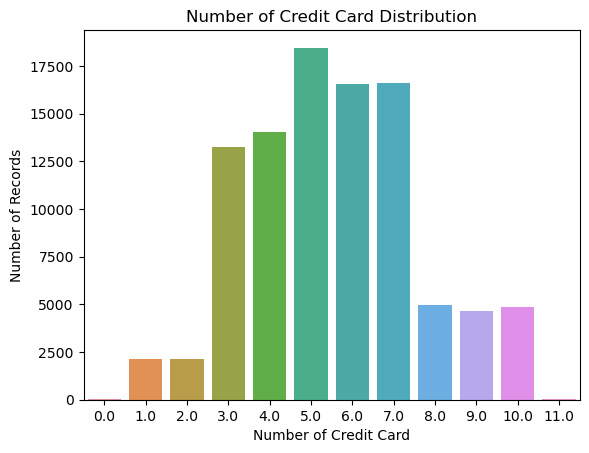

In [37]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

### Interest Rate

**Summary**

1. There were outliers present, after cleaning them up, interest rate ranges from 1% to 34%


🔍 Détails de la colonne 'Interest_Rate':
- Type : int64
- Valeurs manquantes : 0
- Statistiques :
count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

✅ Type de 'Interest_Rate' converti en float

-----------------------------------------------------

Interest Rate Distribution


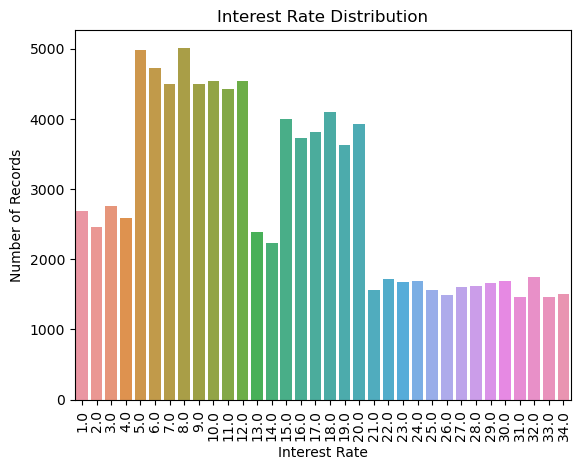

In [38]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

### Delay from Due Date

**Summary**

1. Delay from due date is concentrated between 0 to 30 days. 


🔍 Détails de la colonne 'Delay_from_due_date':
- Type : int64
- Valeurs manquantes : 0
- Statistiques :
count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

✅ Type de 'Delay_from_due_date' converti en float


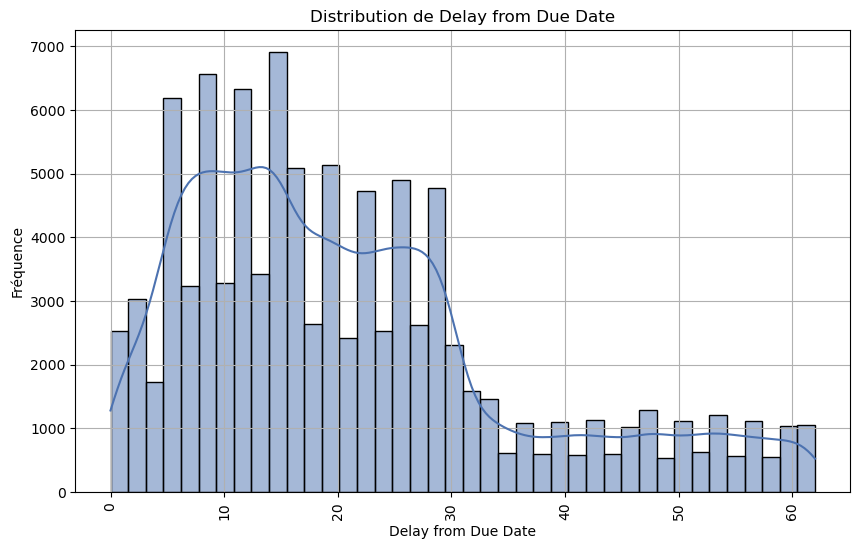

In [39]:
# 📌 Paramètres
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

# 🧾 Étape 1 : Détails de la colonne
def get_column_details(df, column):
    print(f"\n🔍 Détails de la colonne '{column}':")
    print(f"- Type : {df[column].dtype}")
    print(f"- Valeurs manquantes : {df[column].isna().sum()}")
    print(f"- Statistiques :\n{df[column].describe()}")

get_column_details(df_train, column_name)

# 🧹 Étape 2 : Nettoyage
def clean_numerical_field(df, groupby, column, strip='_', datatype='float'):
    # Nettoyage des caractères indésirables
    df[column] = df[column].astype(str).str.replace(strip, '', regex=False)
    
    # Conversion en numérique
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].astype(datatype)
    print(f"\n✅ Type de '{column}' converti en {datatype}")

    # Correction des valeurs incohérentes
    fix_inconsistent_values(df, groupby, column)

# 🧠 Étape 3 : Correction des incohérences
def fix_inconsistent_values(df, groupby, column):
    df_grouped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    
    # Calcul du mode par groupe
    mode_values = df_grouped.apply(lambda x: stats.mode(x, keepdims=True).mode[0] if len(x) > 0 else np.nan)
    
    # Définir les bornes acceptables
    mini = mode_values.min()
    maxi = mode_values.max()
    
    # Remplacer les valeurs incohérentes par NaN
    df[column] = df[column].apply(lambda x: np.NaN if ((x < mini) or (x > maxi) or (x < 0)) else x)

# 📊 Étape 4 : Visualisation
def plot_displot(df, column, title, bins=40, rotation=0):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.title(f'Distribution de {title}')
    plt.xlabel(title)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=rotation)
    plt.grid(True)
    plt.show()

# 🚀 Exécution
clean_numerical_field(df_train, group_by, column_name)
plot_displot(df_train, column_name, user_friendly_name, bins=40, rotation=90)


### Number of Delayed Payment

**Summary**


🔍 Détails de la colonne 'Num_of_Delayed_Payment':
- Type : object
- Valeurs manquantes : 7002
- Statistiques :
count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

✅ Type de 'Num_of_Delayed_Payment' converti en float

-----------------------------------------------------

Number of Delayed Payment Distribution


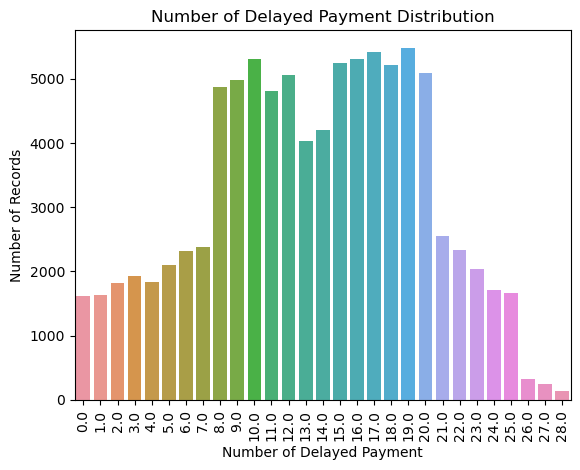

In [40]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

### Changed Credit Limit

**Summary**


🔍 Détails de la colonne 'Changed_Credit_Limit':
- Type : object
- Valeurs manquantes : 0
- Statistiques :
count     100000
unique      4384
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object

✅ Type de 'Changed_Credit_Limit' converti en float


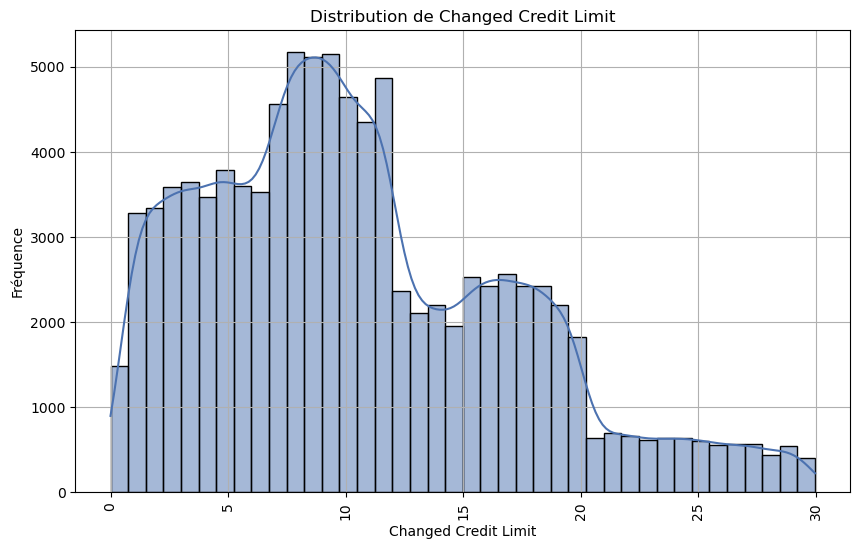

In [41]:
# 📌 Paramètres
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

# 🧾 Étape 1 : Détails de la colonne
def get_column_details(df, column):
    print(f"\n🔍 Détails de la colonne '{column}':")
    print(f"- Type : {df[column].dtype}")
    print(f"- Valeurs manquantes : {df[column].isna().sum()}")
    print(f"- Statistiques :\n{df[column].describe()}")

get_column_details(df_train, column_name)

# 🧹 Étape 2 : Nettoyage
def clean_numerical_field(df, groupby, column, strip='_', datatype='float', replace_value=None):
    # Nettoyage des caractères indésirables
    df[column] = df[column].astype(str)
    
    if replace_value is not None:
        df[column] = df[column].str.replace(replace_value, '', regex=False)
    
    df[column] = df[column].str.replace(strip, '', regex=False)
    
    # Conversion en numérique
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].astype(datatype)
    print(f"\n✅ Type de '{column}' converti en {datatype}")

    # Correction des valeurs incohérentes
    fix_inconsistent_values(df, groupby, column)

# 🧠 Étape 3 : Correction des incohérences
def fix_inconsistent_values(df, groupby, column):
    df_grouped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    
    # Calcul du mode par groupe
    mode_values = df_grouped.apply(lambda x: stats.mode(x, keepdims=True).mode[0] if len(x) > 0 else np.nan)
    
    # Définir les bornes acceptables
    mini = mode_values.min()
    maxi = mode_values.max()
    
    # Remplacer les valeurs incohérentes par NaN
    df[column] = df[column].apply(lambda x: np.NaN if ((x < mini) or (x > maxi) or (x < 0)) else x)

# 📊 Étape 4 : Visualisation
def plot_displot(df, column, title, bins=40, rotation=0):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.title(f'Distribution de {title}')
    plt.xlabel(title)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=rotation)
    plt.grid(True)
    plt.show()

# 🚀 Exécution
clean_numerical_field(df_train, group_by, column_name, strip='_', datatype='float', replace_value='_')
plot_displot(df_train, column_name, user_friendly_name, rotation=90)


### Number of Credit Inquiries

**Summary**


🔍 Détails de la colonne 'Num_Credit_Inquiries':
- Type : float64
- Valeurs manquantes : 1965
- Statistiques :
count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

✅ Type de 'Num_Credit_Inquiries' converti en float

-----------------------------------------------------

Number of Credit Inquiries Distribution


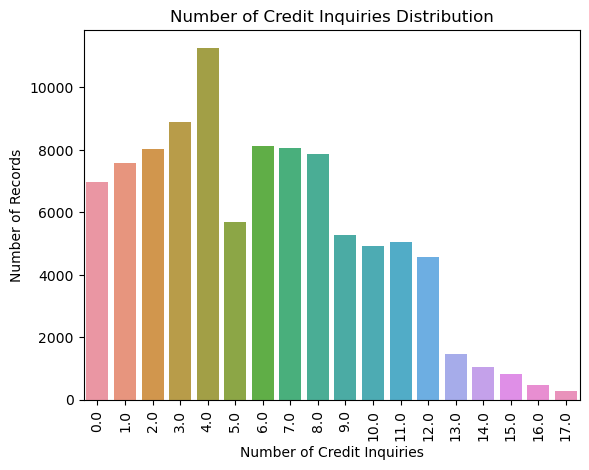

In [42]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

### Outstanding Debt

**Summary**


🔍 Détails de la colonne 'Outstanding_Debt':
- Type : object
- Valeurs manquantes : 0
- Statistiques :
count      100000
unique      13178
top       1360.45
freq           24
Name: Outstanding_Debt, dtype: object

✅ Type de 'Outstanding_Debt' converti en <class 'float'>


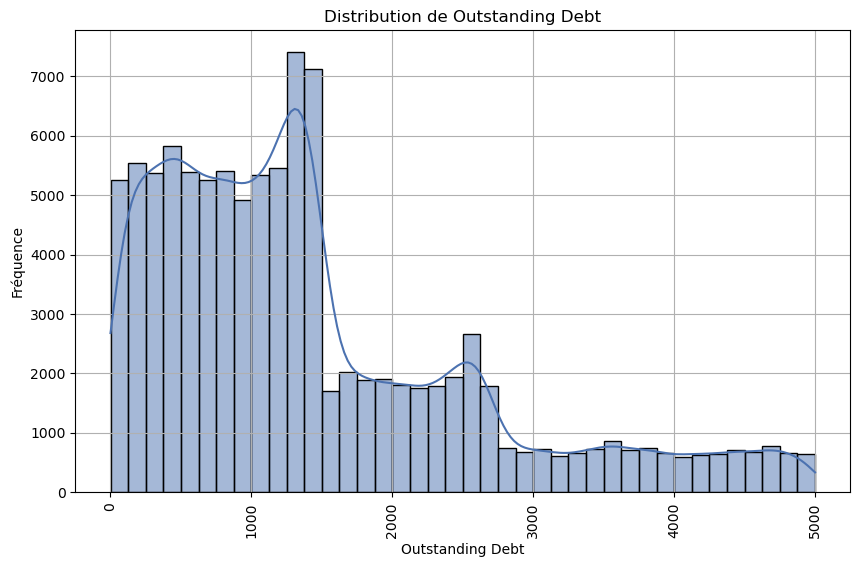

In [43]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

### Credit Utilization Ratio

**Summary**
1. No cleaning is required


🔍 Détails de la colonne 'Credit_Utilization_Ratio':
- Type : float64
- Valeurs manquantes : 0
- Statistiques :
count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


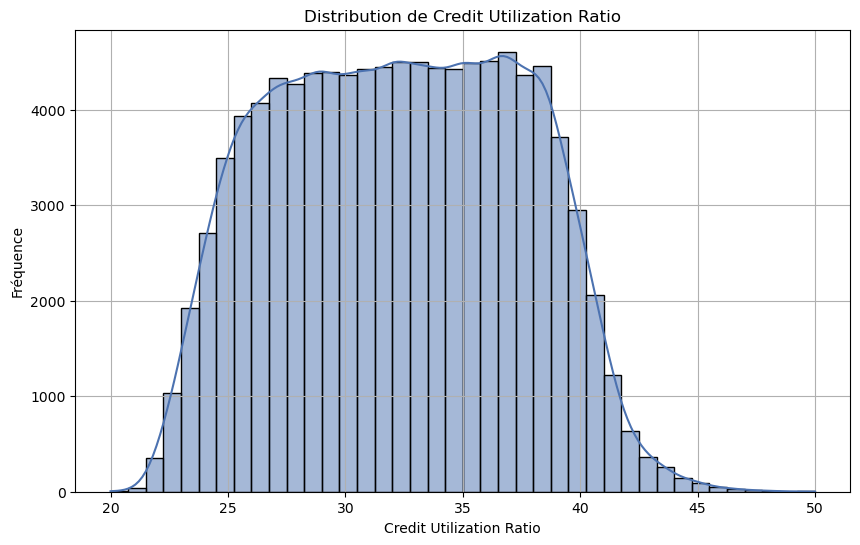

In [44]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

### Credit History Age

**Summary**


In [45]:
df_train['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [46]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
    
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)


🔍 Détails de la colonne 'Credit_History_Age':
- Type : float64
- Valeurs manquantes : 9030
- Statistiques :
count    90970.000000
mean       221.195405
std         99.741364
min          1.000000
25%        144.000000
50%        219.000000
75%        302.000000
max        404.000000
Name: Credit_History_Age, dtype: float64

✅ Type de 'Credit_History_Age' converti en <class 'float'>


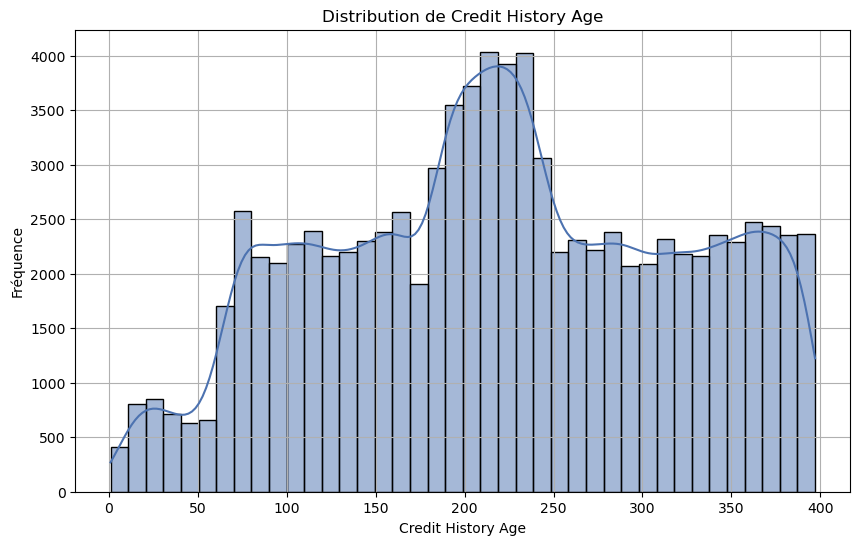

In [47]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

### Total EMI per month

**Summary**


🔍 Détails de la colonne 'Total_EMI_per_month':
- Type : float64
- Valeurs manquantes : 0
- Statistiques :
count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

✅ Type de 'Total_EMI_per_month' converti en float


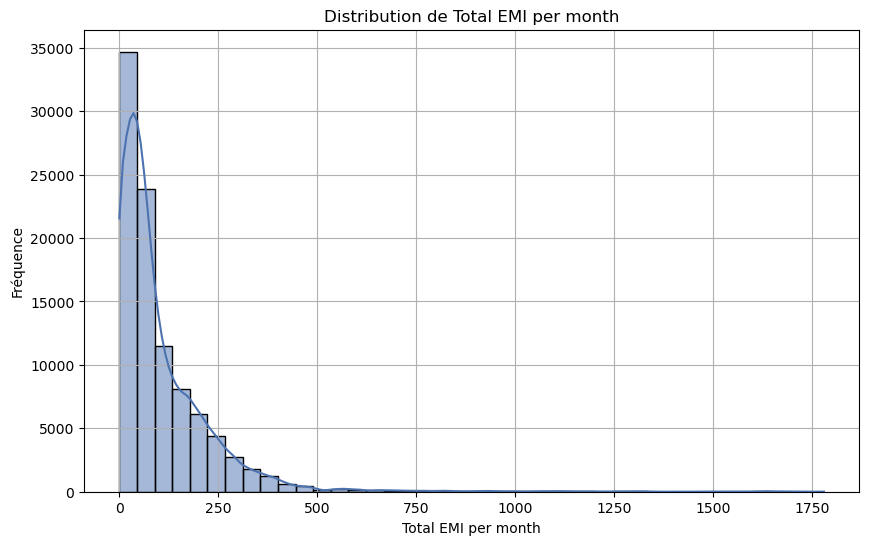

In [48]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

### Amount Invested Monthly

**Summary**


🔍 Détails de la colonne 'Amount_invested_monthly':
- Type : object
- Valeurs manquantes : 4479
- Statistiques :
count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

✅ Type de 'Amount_invested_monthly' converti en <class 'float'>


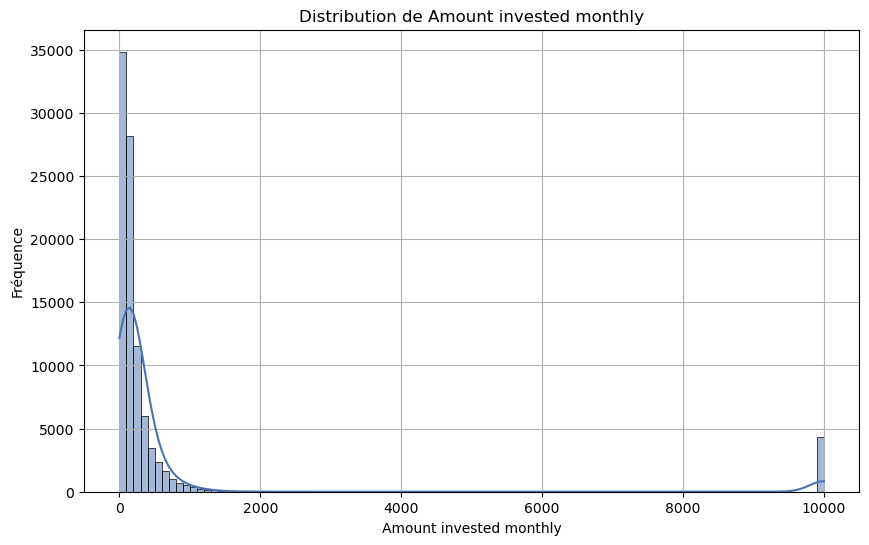

In [49]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float,strip='_')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=100)

### Monthly Balance

**Summary**


🔍 Détails de la colonne 'Monthly_Balance':
- Type : object
- Valeurs manquantes : 1200
- Statistiques :
count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

✅ Type de 'Monthly_Balance' converti en <class 'float'>


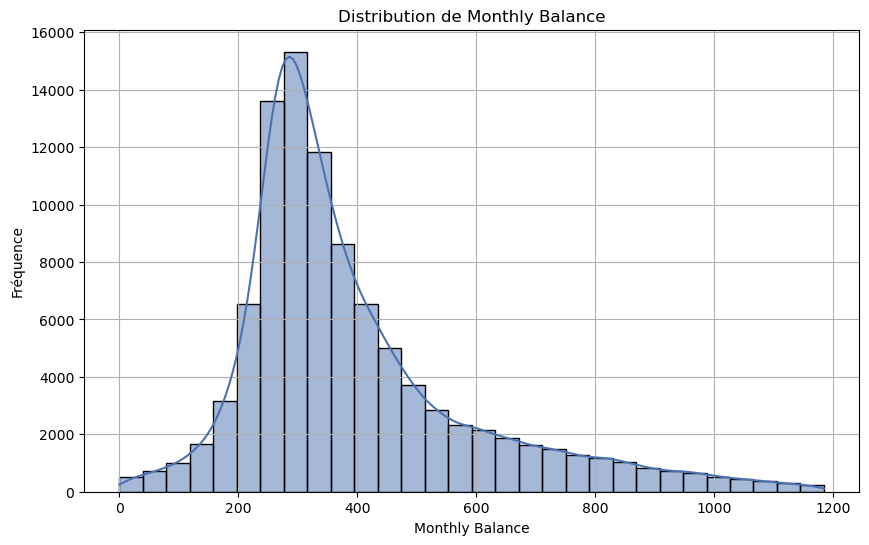

In [50]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
df_train[column_name].replace('',np.nan)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=30)

### Number of Loan

**Summary**


🔍 Détails de la colonne 'Num_of_Loan':
- Type : object
- Valeurs manquantes : 0
- Statistiques :
count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object

✅ Type de 'Num_of_Loan' converti en <class 'float'>


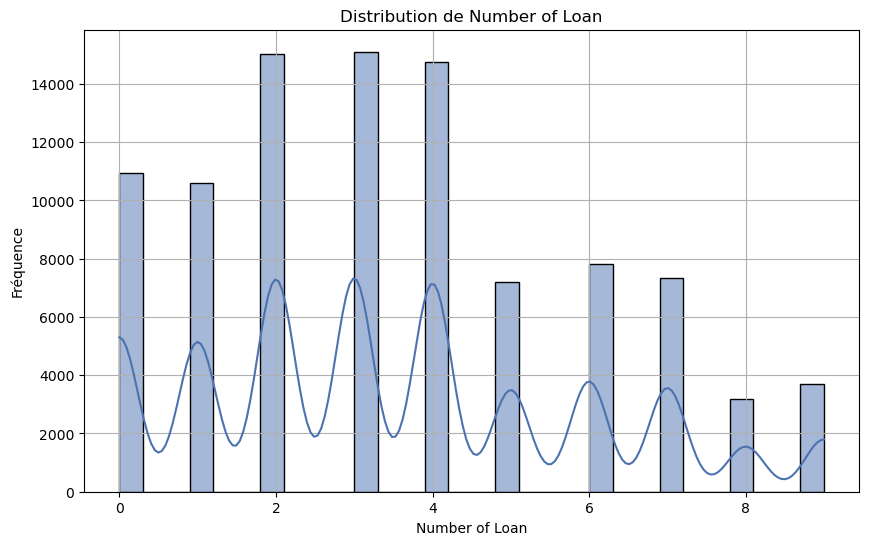

In [51]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=30)

In [52]:
#Check if null values are present
df_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                          2781
SSN                             0
Occupation                      0
Annual_Income                 999
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1345
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Type_of_Loan                    0
Delay_from_due_date           834
Num_of_Delayed_Payment       8382
Changed_Credit_Limit         3933
Num_Credit_Inquiries         3615
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9701
Payment_of_Min_Amount           0
Total_EMI_per_month          3121
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1932
Credit_Score                    0
dtype: int64

In [53]:
from sklearn.impute import SimpleImputer

# Sélection des colonnes numériques à imputer
cols_to_impute = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance'
]

# Imputer avec la médiane
imputer = SimpleImputer(strategy='median')
df_train[cols_to_impute] = imputer.fit_transform(df_train[cols_to_impute])


In [54]:
df_train.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## <span style="color:#FA8072"> 5. Data Transformation </span> <a class="anchor" id="data_transformation"></a>

In [55]:
#Drop columns
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 24)


In [56]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])


In [57]:
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,2,23.0,12,19114.12,3093.745000,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,219.0,1,49.574949,118.280222,3,284.629162,0
2,3,33.0,12,19114.12,3093.745000,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,4,23.0,12,19114.12,3093.745000,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0


In [58]:
#Spli Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

(100000, 23)
(100000,)


In [59]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## <span style="color:#FA8072"> 6. Model Building </span> <a class="anchor" id="model_building"></a>

### Approach 1

In [60]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 23)
(20000, 23)
(80000,)
(20000,)


In [61]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [62]:
# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.7031
Average Precision: 0.6826
Average Recall: 0.6809
-----------------------
Classifier: Random Forest
Average Accuracy: 0.7996
Average Precision: 0.7871
Average Recall: 0.7919
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.6395
Average Precision: 0.6325
Average Recall: 0.6877
-----------------------
Classifier: XGB
Average Accuracy: 0.7619
Average Precision: 0.7453
Average Recall: 0.7492
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3566
           1       0.80      0.83      0.81      5799
           2       0.84      0.81      0.83     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.82      0.81      0.81     20000


---------------------------------------------



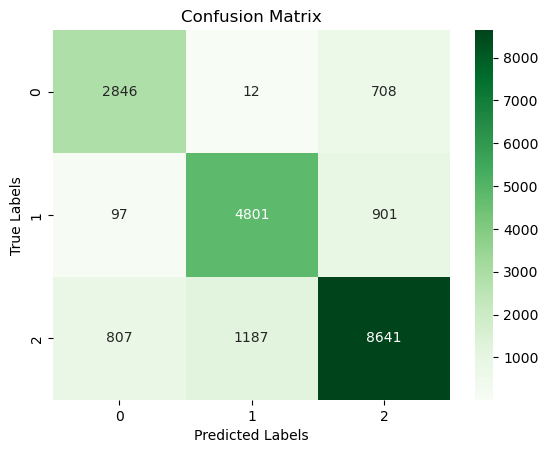

In [63]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [64]:
import joblib

# Sauvegarde du modèle
joblib.dump(rf_classifier, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [66]:
loaded_model = joblib.load('random_forest_model.pkl')


### Approach 2

In [65]:
#Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
pip install numpy scikit-learn threadpoolctl

In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)